In [0]:
import pickle
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers import BatchNormalization
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras.utils import plot_model
from keras import backend as K
from sklearn.model_selection import train_test_split
K.set_image_dim_ordering('th')

In [0]:
with open('train_image.pkl', 'rb') as f:
    data = pickle.load(f)
    data = np.array(data)
    data = data.reshape(-1, 28, 28)

    

In [0]:
with open('train_label.pkl', 'rb') as f:
    label = pickle.load(f)
    label = np.array(label)
    label = label.reshape(-1, 1)

In [26]:
label.shape

(8000, 1)

In [0]:
data_train, data_test, label_train, label_test = train_test_split(data, label, test_size=0.20, random_state=42)

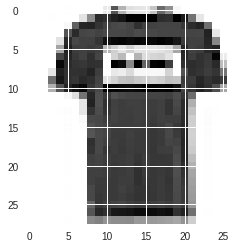

In [15]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.imshow(data[0], interpolation='nearest')
plt.show()

In [0]:
data_train = data_train.reshape(data_train.shape[0], 1, 28, 28).astype('float32')
data_test = data_test.reshape(data_test.shape[0], 1, 28, 28).astype('float32')

In [25]:
print(label_train.shape)

(6400, 7)


In [24]:

label_train = np_utils.to_categorical(label_train)
label_test = np_utils.to_categorical(label_test)
num_classes = label_test.shape[1]
print(num_classes)

7


In [0]:
def cnn_model():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=5,input_shape=(1, 28, 28), activation = 'relu'))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))

    model.add(Conv2D(64, kernel_size=3,activation = 'relu'))
    model.add(Conv2D(64, kernel_size=3,activation = 'relu'))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))

    model.add(Conv2D(128, kernel_size=3, activation = 'relu'))
    model.add(BatchNormalization())

    model.add(Flatten())
    model.add(Dense(256, activation = "relu"))
    model.add(Dropout(0.4))
    model.add(Dense(128, activation = "relu"))
    model.add(Dropout(0.4))
    model.add(Dense(10, activation = "softmax"))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model